# Income Dataset

In [1]:
#the rule of today game is the following:
#if 8 person submit the answer in the chat, then we continue...
#so if you guys are faster, than we can finish this early
#chaky will not CODE a single line.... he will only copy you guys code......

In [2]:
#import stuffs
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. ETL

In [3]:
df = pd.read_csv('income.csv')

In [4]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [5]:
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [6]:
#please check the class label - test task
df['label'].value_counts(normalize=True)
#again, deep learning should be able to handle this for us
#but you can always use imbalance library

0    0.723333
1    0.276667
Name: label, dtype: float64

## 2. EDA

### 2.1 Univariate Analysis
- look at oen variavle
- main tools - countplot and displot
- countplot for discrete features
- displot for continuous features

In [7]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

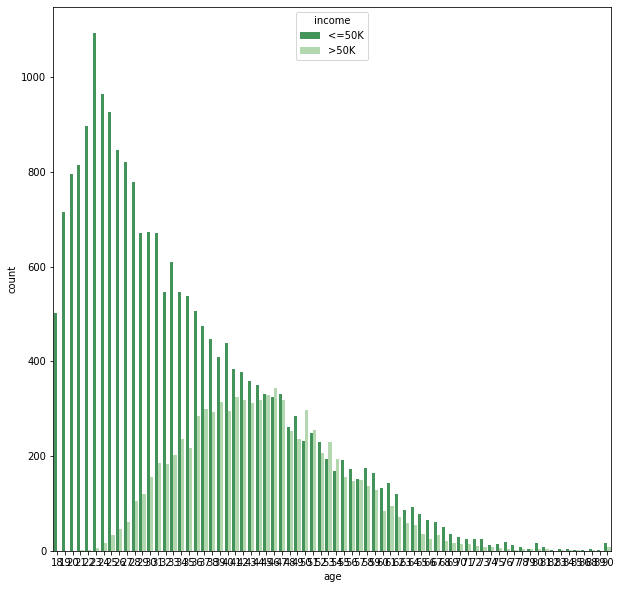

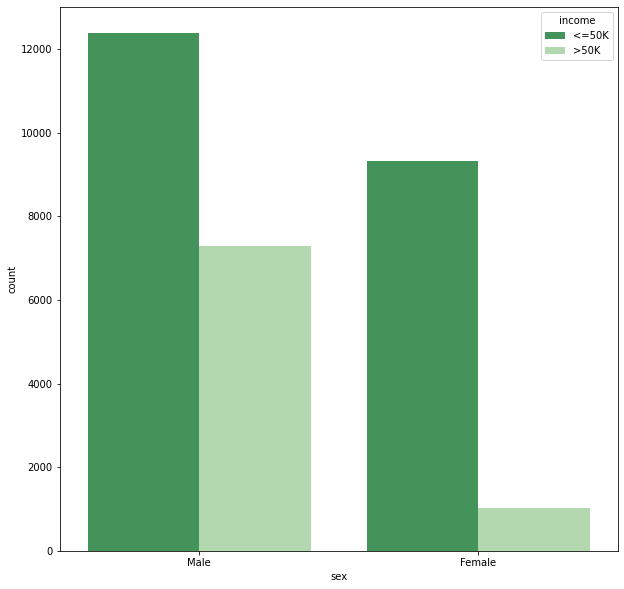

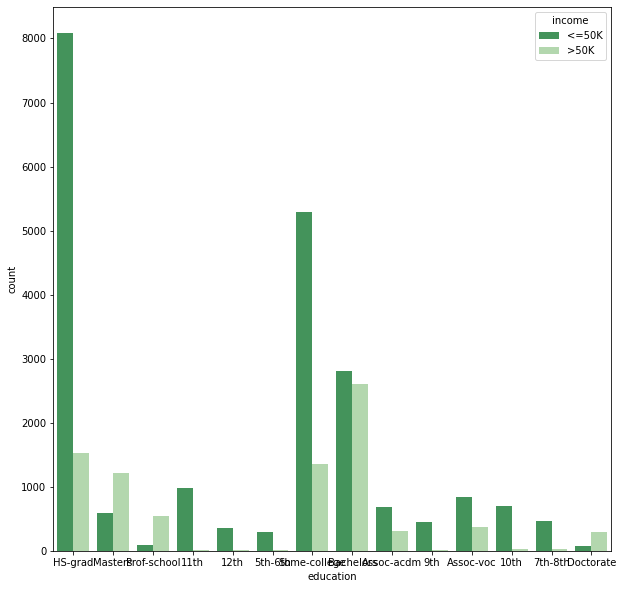

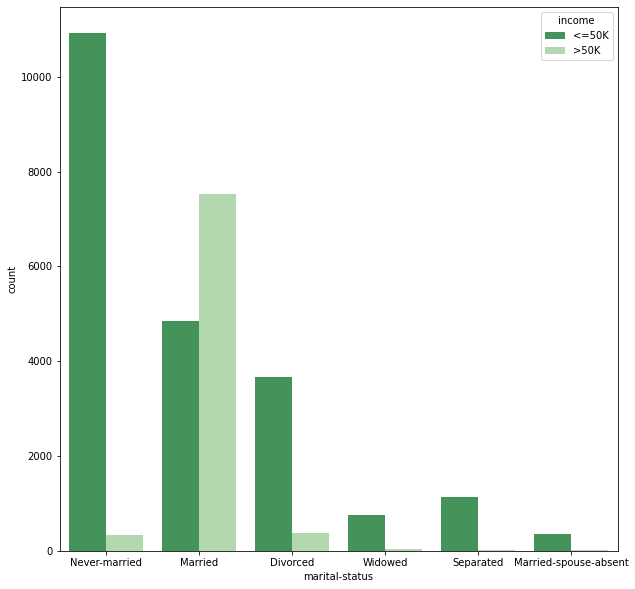

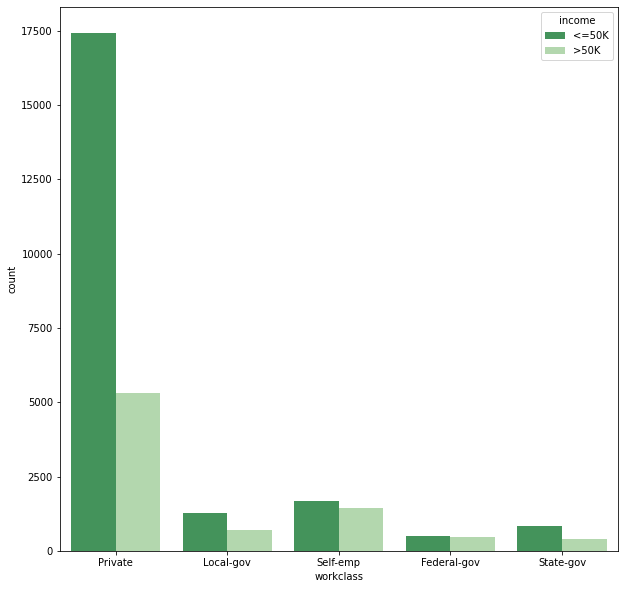

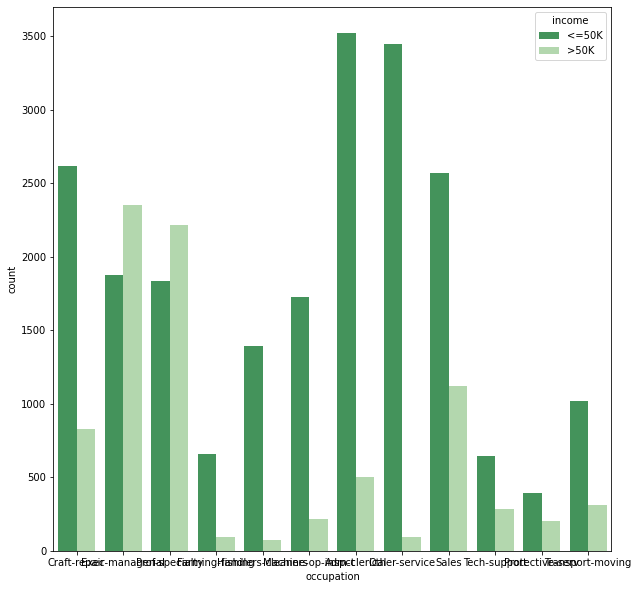

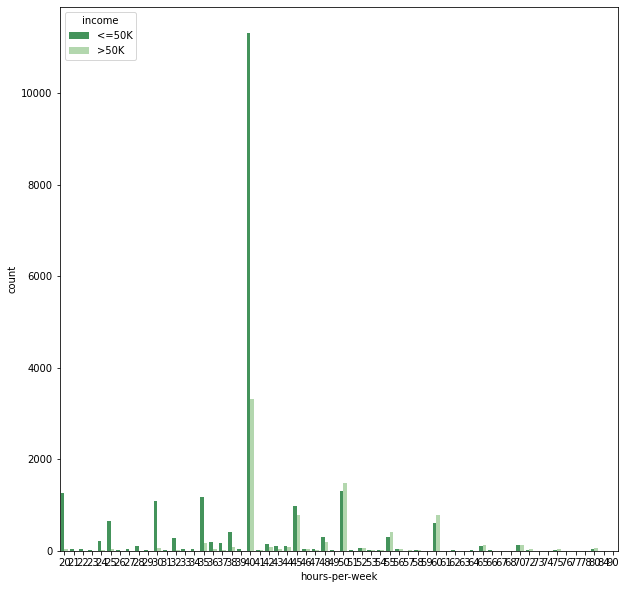

In [8]:
categorical = ['age','sex','education','marital-status','workclass', 'occupation','hours-per-week']

for col in categorical:
    plt.figure(figsize = (10,10))
    sns.countplot(x=col,data=df, hue = df['income'], palette='Greens_r')
    plt.show()

In [9]:
#workclass is dominant (consider it)
#hours-per-week is dominant (consider it)

### 2.2 Multivariate analysis
- look at two featuress/labels at the same time
- e.g., see how bathroomms affect Rent -> bivaraint analysis
- e.g., see hwo size affect Rent
- usually, y is label and x is any giben feature
- Goal: which factor/features are somwhow related tomy label, i.e., Rent
- boxplot : for discrete vs continuous features
- scatterplot : for continuous vs continuous features

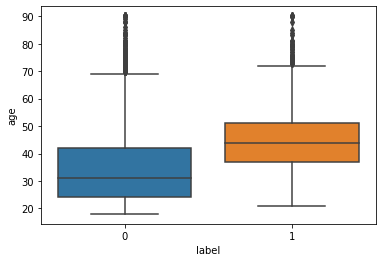

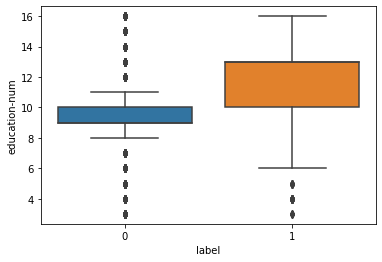

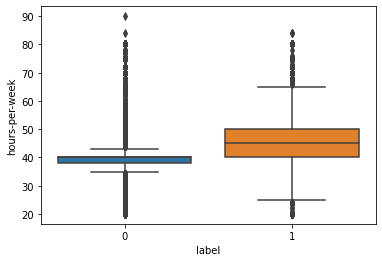

In [10]:
numerical = ['age','education-num','hours-per-week']
for col in numerical:
    sns.boxplot(x=df.label,y=df[col])
    plt.show()

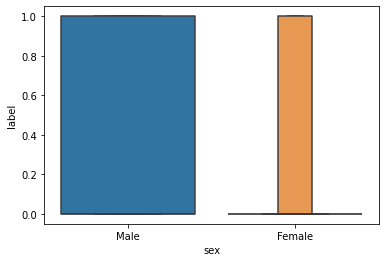

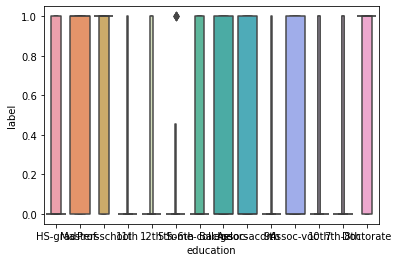

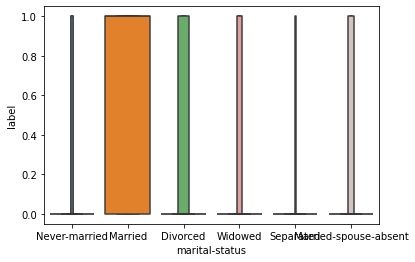

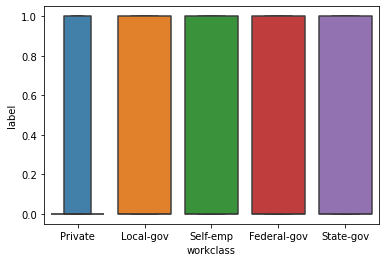

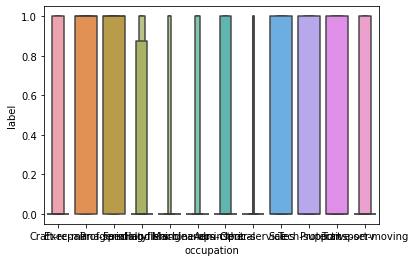

In [11]:
numerical = ['sex','education','marital-status','workclass', 'occupation']

for col in numerical:
    sns.boxenplot(x=df[col],y=df.label)
    plt.show()
# 0 <=50K
# 1 >50K  

In [12]:
#Male is dominant (consider it)
#Married in material status column is outstanding (consider it)

<AxesSubplot:>

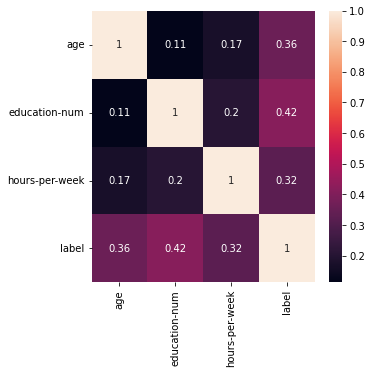

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot =True)

## 3. Feature Engineering

## 4. Feature Extraction

In [14]:
df.education.unique()

array(['HS-grad', 'Masters', 'Prof-school', '11th', '12th', '5th-6th',
       'Some-college', 'Bachelors', 'Assoc-acdm', '9th', 'Assoc-voc',
       '10th', '7th-8th', 'Doctorate'], dtype=object)

In [15]:
df['BelowUndergraduate'] = 0
education = ['Bachelors','Masters','Assoc-voc','Assoc-acdm','Doctorate']
above = df['education'].isin(education)
below = ~df['education'].isin(education)
df.loc[above, 'BelowUndergraduate'] = 0
df.loc[below, 'BelowUndergraduate'] = 1

In [16]:
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label,BelowUndergraduate
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0,1
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1,0
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0,1
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0,1


## 5. Categorify

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 30000 non-null  int64 
 1   sex                 30000 non-null  object
 2   education           30000 non-null  object
 3   education-num       30000 non-null  int64 
 4   marital-status      30000 non-null  object
 5   workclass           30000 non-null  object
 6   occupation          30000 non-null  object
 7   hours-per-week      30000 non-null  int64 
 8   income              30000 non-null  object
 9   label               30000 non-null  int64 
 10  BelowUndergraduate  30000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 2.5+ MB


In [18]:
#columns name
cat_cols = ['sex',
            'marital-status',
            'education-num',
            'workclass', 
            'occupation']
            
cont_cols = ['age', 'hours-per-week']
y = ['label'] #classification

In [19]:
#change all cat_cols in type category
#why we need to categorify
#underhood: thing become integers, but you don't lose
for col in cat_cols:
    df[col] = df[col].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 30000 non-null  int64   
 1   sex                 30000 non-null  category
 2   education           30000 non-null  object  
 3   education-num       30000 non-null  category
 4   marital-status      30000 non-null  category
 5   workclass           30000 non-null  category
 6   occupation          30000 non-null  category
 7   hours-per-week      30000 non-null  int64   
 8   income              30000 non-null  object  
 9   label               30000 non-null  int64   
 10  BelowUndergraduate  30000 non-null  int64   
dtypes: category(5), int64(4), object(2)
memory usage: 1.5+ MB


## 6. Cleaning 

In [21]:
df.isna().sum() 
#There are any features missing

age                   0
sex                   0
education             0
education-num         0
marital-status        0
workclass             0
occupation            0
hours-per-week        0
income                0
label                 0
BelowUndergraduate    0
dtype: int64

## 7. Define X and y

In [22]:
cat_size = [len(df[col].cat.categories) for col in cat_cols]
emb_size = [(size,min(50,size//2)) for size in cat_size]
emb_size
#so you guys explain to yourself, e.g., what is (12,6) mean?
#df.occupation.unique()
#each of the occupartion is represent by a unique vector of size 6....

[(2, 1), (6, 3), (14, 7), (5, 2), (12, 6)]

In [23]:
#combline all categorical column into one tensor
sex = df.sex.cat.codes.values 
status = df['marital-status'].cat.codes.values
education_num = df['education-num'].cat.codes.values
workclass = df.workclass.cat.codes.values
occupation = df.occupation.cat.codes.values
cat = np.stack([sex,status,education_num,workclass,occupation], axis=1)
cat.shape #(30000 samples,5 features)

(30000, 5)

In [24]:
#convert this numpy to tensor
#cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)
cat = torch.tensor(cat, dtype=torch.int32)
cat[:3]
#why here must be int

tensor([[ 1,  3,  6,  2,  1],
        [ 1,  1, 11,  1,  2],
        [ 1,  0,  6,  3,  7]], dtype=torch.int32)

In [25]:
age = df.age.values #.values give you the numpy vector
hrpw = df['hours-per-week'].values
conts = np.stack([age,hrpw],axis=1)
conts.shape #30000,2

(30000, 2)

In [26]:
#conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float32)
conts[:4]
#why here must be float

tensor([[27., 40.],
        [47., 50.],
        [59., 20.],
        [38., 57.]])

In [27]:
#turn your y into tensor
#(sample) or (sample,1) or (sample,targets) -> (sample)
y = torch.tensor(df[y].values).reshape(-1) #or flatten(-1)
y.shape

torch.Size([30000])

## 8. Determine the embedding size

- Before we create the embedding, we need to specify the embedding size...
- Two ways: 
    - randomly pick a size 
        - min(50, unique/2)
    - specify a size

In [28]:
#get the size of all my categorical cols
cat_size = [len(df[col].cat.categories) for col in cat_cols]
cat_size

[2, 6, 14, 5, 12]

In [29]:
emb_size = [(size,min(50,size//2)) for size in cat_size]
emb_size 

[(2, 1), (6, 3), (14, 7), (5, 2), (12, 6)]

## 9. Try to illstrate how Embedding layer works

In [30]:
sample = cat[:1]
sample
twosample = cat[:2]
twosample

tensor([[ 1,  3,  6,  2,  1],
        [ 1,  1, 11,  1,  2]], dtype=torch.int32)

In [31]:
embed_layers = nn.ModuleList([nn.Embedding(unique,emb_s) for unique, emb_s in emb_size])
embed_layers

ModuleList(
  (0): Embedding(2, 1)
  (1): Embedding(6, 3)
  (2): Embedding(14, 7)
  (3): Embedding(5, 2)
  (4): Embedding(12, 6)
)

In [32]:
#empty embedding
sample_embedding = []

for i,e in enumerate(embed_layers):
    sample_embedding.append(e(twosample[:,i]))  #apply embedding layer to colummn i
                                                #apply embedding layer 0 to colummn 0
sample_embedding
#embedding is a randommize values from a uniform distribution (close to 0)

[tensor([[1.2313],
         [1.2313]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.6541, -0.4534, -0.0193],
         [ 0.6208,  0.4688,  0.1062]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.2535,  1.5712, -0.0129, -0.8850,  0.3933,  0.4094, -0.6229],
         [ 1.2950, -0.5536, -0.5835,  1.2012,  0.8992, -0.8749, -1.7202]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.6207,  0.8332],
         [ 0.9100,  0.5018]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.1993, -0.7070,  0.2139, -0.0098,  1.0913, -0.0763],
         [-0.1985, -1.4454, -0.9996,  1.5911, -0.5388,  1.0563]],
        grad_fn=<EmbeddingBackward0>)]

In [33]:
final_embedding = torch.cat(sample_embedding, axis = 1)
final_embedding

tensor([[ 1.2313, -0.6541, -0.4534, -0.0193,  0.2535,  1.5712, -0.0129, -0.8850,
          0.3933,  0.4094, -0.6229, -0.6207,  0.8332, -0.1993, -0.7070,  0.2139,
         -0.0098,  1.0913, -0.0763],
        [ 1.2313,  0.6208,  0.4688,  0.1062,  1.2950, -0.5536, -0.5835,  1.2012,
          0.8992, -0.8749, -1.7202,  0.9100,  0.5018, -0.1985, -1.4454, -0.9996,
          1.5911, -0.5388,  1.0563]], grad_fn=<CatBackward0>)

In [34]:
dl = nn.Dropout(0.5)
final_embedding = dl(final_embedding)
final_embedding 

tensor([[ 0.0000, -1.3081, -0.0000, -0.0387,  0.0000,  0.0000, -0.0258, -1.7701,
          0.7866,  0.0000, -1.2458, -1.2413,  0.0000, -0.3986, -1.4139,  0.4279,
         -0.0000,  0.0000, -0.1526],
        [ 0.0000,  1.2416,  0.0000,  0.0000,  0.0000, -0.0000, -0.0000,  2.4023,
          0.0000, -0.0000, -3.4403,  0.0000,  0.0000, -0.0000, -2.8908, -0.0000,
          3.1823, -1.0777,  0.0000]], grad_fn=<MulBackward0>)

In [35]:
sample_cont = conts[:2]
sample_cont

tensor([[27., 40.],
        [47., 50.]])

In [36]:
sample_cont = sample_cont.type(torch.float32)

In [37]:
batch_norm1d = nn.BatchNorm1d(2)
output = batch_norm1d(sample_cont)
output #across features

tensor([[-1., -1.],
        [ 1.,  1.]], grad_fn=<NativeBatchNormBackward0>)

## 10. Define the model

In [38]:
#create your training and testing split
train_size = 6000
test_size = 1000
#why Chaky don't use PyTorch dataset or dataloader? 
#silly quesgion, why Chaky don't use all the dataset (30,000) 
#actually, Chaky should have use validation set

cat_train = cat[:train_size]
cat_test = cat[train_size:test_size+train_size]
cont_train = conts[:train_size]
cont_test = conts[train_size:test_size+train_size]
y_train = y[:train_size]
y_test = y[train_size:test_size+train_size]

In [39]:
class IncomeModule(nn.Module):
    def __init__(self, emb_size, cont_size, out_size, layer_size = [200,100], p = 0.5):
        super().__init__()
        #embedding layers
        self.embed_layer = nn.ModuleList([nn.Embedding(unique, emb_s) for unique, emb_s in emb_size])
        #dropout for the embedding layers
        self.dropout = nn.Dropout(p)
        #batchnorm for the cont col
        self.batchnorm1d = nn.BatchNorm1d(cont_size)

        cat_size = sum(emb_s for _, emb_s in emb_size)
        input_size = cat_size + cont_size
        #a list of layer
            #linear-> Relu -> batchnorm -> dropout
        #linear(something, out_size)
        layerlist = []
        for i in layer_size:
            layerlist.append(nn.Linear(input_size,i)) #(input_size,200)
            layerlist.append(nn.ReLU(inplace=True)) 
            layerlist.append(nn.BatchNorm1d(i)) 
            layerlist.append(nn.Dropout(p))
            input_size = i 
        layerlist.append(nn.Linear(layer_size[-1],out_size))

        self.layers = nn.Sequential(*layerlist) #* is same as nn.ModuleList

    def forward(self, x_cat,x_cont):
        #first get the embedding for the cat_cols 
        # x_cat : (sample_size,5) #x_cont : (sample_size,2)
        embeddings = []
        for i,e in enumerate(self.embed_layer):
            embeddings.append(e(x_cat[:,i]))
        #embeddings.shape : [   (sample_size, emb_size1), 1
        #                       (sample_size, emb_size2), 7
        #                       (sample_size, emb_size3), 3
        #                       (sample_size, emb_size4), 2
        #                       (sample_size, emb_size5)] 6
        #Then concatenate embedding of cat_cols into 1 embedding
        x = torch.cat(embeddings,1) 
        #embedding.shape : (sample_size,19) #1+3+7+2+6 
        #perform dropout for these embeddings. Why? Why we don't need to apply dropout for cont_cols
        x = self.dropout(x) #what will happen after droup out --> (sample_size,19)
        #batchnorm con_cols. Why batchnorm? batchnorm is across samples or features
        x_cont = self.batchnorm1d(x_cont) #what will happen after batchnorm1d? --> #x_cont : (sample_size,2)
        #concatenate cat and con
        x = torch.cat([x,x_cont],1) #x: (sample_size,21)
        #apply all the layers
        x = self.layers(x)
        #last x.shape: ????
        return x

#I don't know ..... This is called designing neural network
#you know what is dropout, batchnorm, but combining then is like an ART...... trial and error.

#because neural network can come up with better one, through backpropagation

In [40]:
#test your model
torch.manual_seed(9999) 
#in deep learning, usually we cannot do cross-validation
#because it's huge dataset...
#to get multiple performance metrics, we use different seeds
#maybe compare across 5 seeds
#create model
model = IncomeModule(emb_size, conts.shape[1], len(y.unique()))
model

#try take some sample cat and cont
# cat[:1]
# conts[:1]

#run the model
output = model(cat[:5],conts[:5])

#check the output 
print(output.shape)

#is the output shaep the thing you wan???
print(output)
#what does this output means
#[ 0.0573,  0.9109] is this???
#[ not-normalized prob of class 0, not-normalized prob of class 1]
# class 0 
#why they do not sum to 1
#my next question, when does my output got normalized?

torch.Size([5, 2])
tensor([[ 0.0390,  0.5506],
        [-1.0844,  0.5424],
        [ 0.3307, -0.5839],
        [ 0.0335, -0.8166],
        [-1.3469,  0.8300]], grad_fn=<AddmmBackward0>)


In [41]:
softmax = nn.Softmax()

soft_out = softmax(output)
soft_out

C:\Users\Guntsv\AppData\Local\Temp\ipykernel_15584\1177283475.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  soft_out = softmax(output)


tensor([[0.3748, 0.6252],
        [0.1643, 0.8357],
        [0.7139, 0.2861],
        [0.7006, 0.2994],
        [0.1018, 0.8982]], grad_fn=<SoftmaxBackward0>)

In [42]:
#when you say loss = CrossEntropyLoss(yhat,y_test)
#CrossEntropyLoss do softmax(yhat) then do cross_entropy with y_test

## Training!!!

In [66]:
epochs    = 500
J_fn      = nn.CrossEntropyLoss() #sometimes people called this criterion or loss rather than J_fn
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
            #how can we know lr = 0.01 is good enough
            #why not 0.001, 0.0001
            #because our gradients are very small
            #it make sense that our lr should NOT be too small!
losses = []

#for epoch
for i in range(epochs):
    #1.prediction using model()
    yhat = model(cat_train,cont_train)
    #2. loss using J_fn()
    loss = J_fn(yhat,y_train)
    #please collect the loss and accuracy
    losses.append(loss)
    #3. empty the gradients (zero_grad())
    #you should NOT print the grad after zero_grad
    optimizer.zero_grad()
    #4.backpropagate (backward())
    #you should print the grad after backward
    loss.backward()

    # print(model.layers[0].bias.grad)
    # print(model.layers[4].weight.grad)
    # print(model.layers[4].bias.grad)

    #5. update parameters (step())
    optimizer.step()
    #every 50 epochs, pritn loss and accuracy
    if i % 50 == 0:
        print(torch.mean(model.layers[0].weight.grad))
        print(f'Epoch: {i:2.0f}; Loss: {loss:3.2f}')

tensor(-2.1665e-06)
Epoch:  0; Loss: 0.23
tensor(-1.5738e-06)
Epoch: 50; Loss: 0.23
tensor(-3.9071e-06)
Epoch: 100; Loss: 0.23
tensor(-9.3657e-06)
Epoch: 150; Loss: 0.23
tensor(3.0634e-06)
Epoch: 200; Loss: 0.24
tensor(1.5820e-07)
Epoch: 250; Loss: 0.23
tensor(5.2666e-06)
Epoch: 300; Loss: 0.23
tensor(3.5129e-06)
Epoch: 350; Loss: 0.23
tensor(7.5449e-07)
Epoch: 400; Loss: 0.23
tensor(-7.3077e-08)
Epoch: 450; Loss: 0.23


Text(0, 0.5, 'loss')

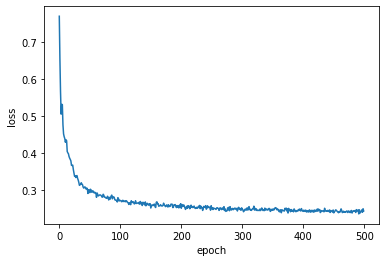

In [49]:
#plot the losses and acc
train_loss = [loss.item() for loss in losses]
plt.plot(range(epochs),train_loss)
plt.xlabel('epoch')
plt.ylabel('loss')

# 11. Testing/Inference

In [57]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    yhat = model(cat_test, cont_test)
    loss = J_fn(yhat, y_test)
    predicted = torch.max(yhat, 1)[1]
    acc  = accuracy_score(predicted, y_test)
    
print(acc)

0.881
